## Amazon SageMaker high-level Python library

Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License"). You may not use this file except
in compliance with the License. A copy of the License is located at

https://aws.amazon.com/apache-2-0/

or in the "license" file accompanying this file. This file is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the
specific language governing permissions and limitations under the License.

In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv('training.csv', header=None)

# the df.as_matrix() didn't work
# matrix = df.as_matrix()

print('Rows and columns: ', df.shape)
df.head()

Rows and columns:  (150, 251)


,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,1,...,2,1,0,0,0,0,0,0,0,0


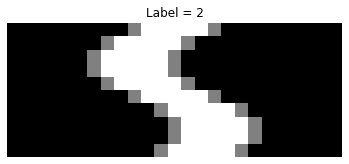

In [12]:
# pandas documentation version 0.25.1 says use df.values() instead ... tried df.values instead, that works
# https://pandas.pydata.org/pandas-docs/version/0.25.1/reference/api/pandas.DataFrame.as_matrix.html
matrix = df.values

%matplotlib inline
import matplotlib.pyplot as plt

def show_road(img, caption='', subplot=None):
    if subplot==None:
        _,(subplot)=plt.subplots(1,1)
    imgr=img.reshape((10,25))
    subplot.axis('off')
    subplot.imshow(imgr, cmap='gray')
    plt.title(caption)

row = 15
show_road(matrix[row][1:], "Label = {}".format(matrix[row][0]))

In [5]:
import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()

In [6]:
multiclass_estimator = sagemaker.LinearLearner(role=role,
                                               train_instance_count=1,
                                               train_instance_type='ml.m4.xlarge',
                                               predictor_type='multiclass_classifier',
                                               num_classes=3)

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [7]:
mini_batch_size = 100
records = matrix[:,:-1].astype('float32')
labels = matrix[:,0].astype('float32')
train_records = multiclass_estimator.record_set(records, labels, channel='train')
multiclass_estimator.fit([train_records])


Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2020-12-23 21:30:29 Starting - Starting the training job...
2020-12-23 21:30:52 Starting - Launching requested ML instancesProfilerReport-1608759028: InProgress
......
2020-12-23 21:31:53 Starting - Preparing the instances for training......
2020-12-23 21:32:54 Downloading - Downloading input data...
2020-12-23 21:33:19 Training - Downloading the training image..
2020-12-23 21:33:59 Uploading - Uploading generated training model
2020-12-23 21:33:59 Completed - Training job completed
Docker entrypoint called with argument(s): train
Running default environment configuration script
[12/23/2020 21:33:44 INFO 140559972677440] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_po

In [8]:
multiclass_predictor = multiclass_estimator.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


-------------------!

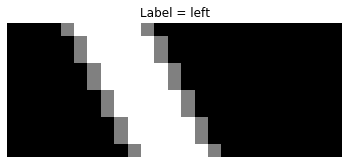

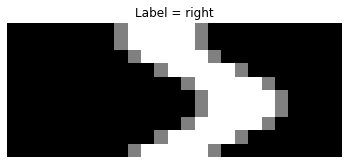

In [9]:
labels = ["left", "straight", "right"]

experiment = np.array([[0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0]]).astype('float32')
result = multiclass_predictor.predict(experiment)
predicted_label = int(result[0].label['predicted_label'].float32_tensor.values[0])
show_road(experiment, "Label = {}".format(labels[predicted_label]))

experiment = np.array([[0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0]]).astype('float32')
result = multiclass_predictor.predict(experiment)
predicted_label = int(result[0].label['predicted_label'].float32_tensor.values[0])
show_road(experiment, "Label = {}".format(labels[predicted_label]))



In [10]:
# delete endpoint
multiclass_predictor.delete_endpoint()